In [ ]:
#variables available in the by module:

#ID: Locates elements whose ID attribute matches the search value.
#XPATH: Locates elements matching an XPath expression.
#NAME: Locates elements whose NAME attribute matches the search value.
#TAG_NAME: Locates elements whose tag name matches the search value.
#CLASS_NAME: Locates elements whose class name contains the search value.
#CSS_SELECTOR: Locates elements matching a CSS selector.

#!pip install selenium
#!pip install undetected-chromedriver

#https://steamdb.info/robots.txt
import pandas as pd
import time
import numpy as np
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
#from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.proxy import Proxy, ProxyType
import undetected_chromedriver as uc

#import chromedriver_autoinstaller 
 
#chromedriver_autoinstaller.install() 
proxy = Proxy({
    'proxyType': ProxyType.MANUAL,
    'ssl_proxy': '188.166.56.246:80'
})

# Set the proxy server in the Chrome options
#options = webdriver.ChromeOptions()
#options.add_argument(f'--proxy-server={proxy.ssl_proxy}')

# Create the Chrome driver with the proxy settings
#driver = webdriver.Chrome(options=options)
#options = webdriver.ChromeOptions()
#options.add_argument("--disable-blink-features=AutomationControlled")
#driver = webdriver.Chrome(options=options)
driver = uc.Chrome()
#driver.delete_all_cookies()
driver.get("https://steamdb.info/graph/")
j=0
while(j!=10):
    try:
        c=driver.find_element(By.NAME,'table-apps_length')
        break
    except:
        wait = WebDriverWait(driver, 5) 
        time.sleep(6)
        driver.get("https://steamdb.info/graph/")
    j+=1
#handle=driver.current_window_handle
#driver.service.stop()

#driver = webdriver.Chrome(chrome_driver,options=chrome_options)
#driver.switch_to.window(handle)
drop_down_list = driver.find_element(By.NAME,'table-apps_length')
wait = WebDriverWait(driver, 5) 
time.sleep(2)
drop_down_list.click()
value_drop_list=Select(drop_down_list)
value_drop_list.select_by_visible_text("All (slow)")
time.sleep(2)
#table=driver.find_element(By.CLASS_NAME,'table-responsive')

app_name=[]#
app_type=[]#
developer=[]#
publisher=[]#
supported_systems=[]#
last_update=[]#
release_date=[]#
controller_support=[]#
metacritic_score=[]#
#no_servers=[]
is_free_app=[]#
has_adult_content=[]#
Genres=[]#
positive_review_percentage=[]#
#supported_languages=[]
#dlc=[]
#has_achievements=[]
day_peak=[]#
all_time_peak=[]#
current_players=[]#
#followers=[]?
#positive_reviews=[]
#negative_reviews=[]
#all_time_peak_twitch=[]
#top_sellers_place=[]
#content_descriptors=[]
#has_trading_cards=[]



x_path1_page="/html/body/div[4]/div[1]/div[2]/div[4]/div[2]/div[2]/table/tbody/tr["
x_path2_page="]/td[3]/a"

i=2000
while(i!=3400):
    print(i)
    driver.execute_script("window.scrollTo(0, 100);")
    time.sleep(10)
    (driver.find_element(By.XPATH,x_path1_page+str(i)+x_path2_page)).click()
    pattern="(\d*.*\d*.*\d+) (players|users) right now (\d*.*\d*.*\d+) 24-hour peak (\d*.*\d*.*\d+) all-time peak"
    try:
        text_players=driver.find_element(By.CLASS_NAME,'app-chart-numbers-big').text
        text_players=text_players.replace('\n',' ')
        #print(text_players)
        match= re.search(pattern,text_players)
        current_players.append(int((match.group(1)).replace(',','')))
        day_peak.append(int((match.group(3)).replace(',','')))
        all_time_peak.append(int((match.group(4)).replace(',','')))
    except:
        current_players=np.append(current_players,np.nan)
        day_peak=np.append(day_peak,np.nan)
        all_time_peak=np.append(all_time_peak,np.nan)
    #print(current_players)
    #print(day_peak)
    #print(all_time_peak)
    try:
        driver.find_element(By.ID,'tab-info').click()
    except:
        time.sleep(4)
        #driver.find_element(By.CLASS_NAME,'tabnav-tab selected').click()
    #WebDriverWait(driver, 10).until(EC.staleness_of(text_players1))
    #wait = WebDriverWait(driver, 4)
    time.sleep(4)
    #wait.until(EC.text_to_be_present_in_element((By.TAG_NAME, "h2"), "Supported Languages"))
    try:
        app_name.append(driver.find_element(By.TAG_NAME,"h1").text)
    except:
        app_name=np.append(app_name,np.nan)
      
    try:
        app_type.append(driver.find_element(By.XPATH,"//tr[td[text()='App Type']]/td[2]").text)
    except:
         app_type=np.append(app_type,np.nan)
    try:
        developer.append(driver.find_element(By.XPATH,"//tr[td[text()='Developer']]/td[2]").text)
    except:
        developer=np.append(developer,np.nan)
    time.sleep(1)      
    try:
        publisher.append(driver.find_element(By.XPATH,"//tr[td[text()='Publisher']]/td[2]").text)
    except:
        publisher=np.append(publisher,np.nan)
        
    
    try:
        supported_systems.append(driver.find_element(By.XPATH,"//tr[td[text()='Supported Systems']]/td[2]").text)
    except:
        supported_systems=np.append(supported_systems,np.nan)
        
    try:
        last_update.append(driver.find_element(By.XPATH,"//tr[td[text()='Last Record Update']]/td[2]").text) 
    except:
        last_update=np.append(last_update,np.nan)
    time.sleep(1)  
    try:
        release_date.append(driver.find_element(By.XPATH,"//tr[td[text()='Release Date']]/td[2]").text)
    except:
        release_date=np.append(release_date,np.nan)
    
    try:
        controller_support.append(driver.find_element(By.XPATH,"//tr[td[text()='controller_support']]/td[2]").text)
    except:
        controller_support.append('none')
    
    try:
        metacritic_score.append(driver.find_element(By.XPATH,"//tr[td[text()='metacritic_score']]/td[2]").text)
    except:
        metacritic_score=np.append(metacritic_score,np.nan)
    time.sleep(1)  
    try:
        is_free_app.append(driver.find_element(By.XPATH,"//tr[td[text()='IsFreeApp']]/td[2]").text)
    except:
        is_free_app.append('No')
    
    try:
        has_adult_content.append(driver.find_element(By.XPATH,"//tr[td[text()='has_adult_content']]/td[2]").text)
    except:
         has_adult_content.append('No')
    time.sleep(1)         
    try:
        Genres.append(driver.find_element(By.XPATH,"//tr[td[text()='Store Genres']]/td[2]").text)
    except:
        Genres=np.append(Genres,np.nan)
    
    try:
        positive_review_percentage.append(driver.find_element(By.XPATH,"//tr[td[text()='review_percentage']]/td[2]").text)
    except:
         positive_review_percentage=np.append(positive_review_percentage,np.nan)
    print(app_name)
    print(app_type)
    print(developer)
    print(publisher)
    print(supported_systems)
    print(last_update)
    print(release_date)
    print(controller_support)
    print(metacritic_score)
    print(is_free_app)
    print(has_adult_content)
    print(Genres)
    print(positive_review_percentage)
    
    if(i%1==0):
        file_name='data.csv'
        data={'app name':app_name,'app type':app_type,'developer':developer,'publisher':publisher,
          'supported systems':supported_systems, 'last_update': last_update, 'release date': release_date,
          'controller support': controller_support,'metacritic_score' :metacritic_score,'is free app': is_free_app,
          'has adult content': has_adult_content,'Genres': Genres,'positive review percentage':positive_review_percentage, 
          'day peak': day_peak,'all time peak': all_time_peak,'current players': current_players}
        df=pd.DataFrame(data) 
        if(i==10):
            df.to_csv(file_name)
        else:
            df.to_csv(file_name, mode='a', header=False)
        app_name=[]
        app_type=[]
        developer=[]
        publisher=[]
        supported_systems=[]
        last_update=[]
        release_date=[]
        controller_support=[]
        metacritic_score=[]
        is_free_app=[]
        has_adult_content=[]
        Genres=[]
        positive_review_percentage=[]
        day_peak=[]
        all_time_peak=[]
        current_players=[]
        
    time.sleep(1)
    driver.get("https://steamdb.info/graph/")
    drop_down_list = driver.find_element(By.NAME,'table-apps_length')
    drop_down_list.click()
    value_drop_list=Select(drop_down_list)
    value_drop_list.select_by_visible_text("All (slow)")
    i+=1

driver.close()



In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df = df.drop_duplicates(keep='first')
df = df.dropna(axis = 0,  thresh = 3)

for col in df:
    if(df[col].dtypes=='int64' or df[col].dtypes=='float64'):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        IQR_range = 1.5 * IQR
        df.loc[(df[col] < Q1 - IQR_range) | (df[col] > Q3 + IQR_range ),col]=np.nan
list_cat=list(df.select_dtypes(include=['object']))
list_num=list(df.select_dtypes(include=['int64','float64']))        
for obj in list_cat:
    df[obj]=df[obj].fillna(df[obj].mode()[0])
for obj in list_num:
    df[obj]=df[obj].fillna(df[obj].median())
df = df.drop(columns='metacritic_score')
df = df[df['app type']=='Game']
df['primary genre']=(df['Genres'].str.split('(', expand=True))[0]
df['Genres'] = df['Genres'].str.split(',')
df['update month']=(df['last update'].str.split(' ', expand=True))[1]
df['update year']=(df['last update'].str.split(' ', expand=True))[2]
df['release month'] = (df['release date'].str.split(' ', expand=True))[1]
df['release year'] = (df['release date'].str.split(' ', expand=True))[2]





#print(df['supported systems'])
#print(df['Genres'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1757 entries, 0 to 1789
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1757 non-null   float64
 1   app name                    1757 non-null   object 
 2   app type                    1757 non-null   object 
 3   developer                   1757 non-null   object 
 4   publisher                   1757 non-null   object 
 5   supported systems           1757 non-null   object 
 6   last update                 1757 non-null   object 
 7   release date                1757 non-null   object 
 8   controller support          1757 non-null   object 
 9   metacritic_score            1757 non-null   float64
 10  is free app                 1757 non-null   object 
 11  has adult content           1757 non-null   object 
 12  Genres                      1757 non-null   object 
 13  positive review percentage  1757 

Text(0, 0.5, 'current players')

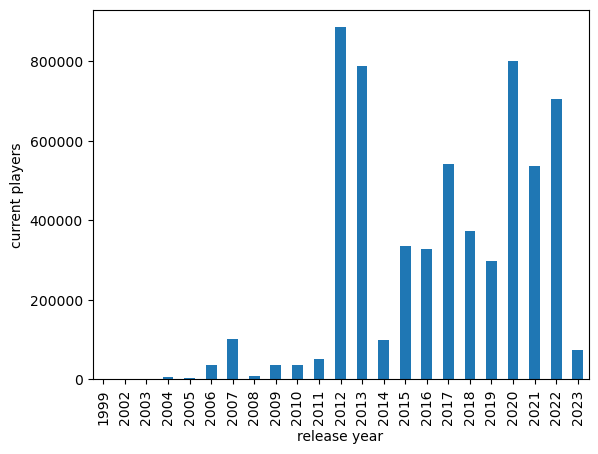

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#df.groupby('release year')['current players'].sum().plot(kind='bar')
#plt.ylabel('current players')

#df.groupby('primary genre')['current players'].sum().plot(kind='bar')
#plt.ylabel('current players')

#tab=pd.crosstab(df['release year'], df['primary genre'],normalize='index')
#tab.plot(kind='bar')

#df.groupby('release year')['positive review percentage'].mean().plot(kind='line')
#plt.ylabel('positive review percentage')


In [19]:
import pandas as pd
#df['primary genre'].unique()
df['controller support'].replace({'none':1,'partial':2,'full':3}, inplace=True)
df['is free app'].replace({'No':0,'Yes':1}, inplace=True)
df['has adult content'].replace({'No':0,'Yes':1}, inplace=True)
df= pd.get_dummies(df, columns=['primary genre'], prefix=['genre'])
df=pd.get_dummies(df, columns=['supported systems'], prefix=['system'])
df['release month'].replace({'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7
    ,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}, inplace=True)
df['update month'].replace({'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7
    ,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}, inplace=True)
df = df.drop("developer", axis=1)
df = df.drop("publisher", axis=1)
df = df.drop("Genres", axis=1)
df = df.drop("app name", axis=1)
df = df.drop("app type", axis=1)
df = df.drop("release date", axis=1)
df = df.drop("last update", axis=1)


In [30]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
y=df["current players"]
X= df.drop("current players", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 41)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
trained_model=linear_model.LinearRegression().fit(X_train_scaled,y_train)
y_predicted=trained_model.predict(X_test_scaled)
eval_test=r2_score(y_test,y_predicted)
print(eval_test)



0.987364923852497
